In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel(r"/content/drive/MyDrive/Innomatics Research lab/data.xlsx")


In [4]:
print(df.head(5))

  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

In [5]:
df.rename(columns= {'Unnamed: 0': 'travel_type'}, inplace = True)

In [6]:
display(df)

,travel_type,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [7]:
claimed_salary_range = (250000, 300000)
relevant_job_titles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
relevant_data = df[df['Designation'].str.lower().isin(map(str.lower, relevant_job_titles))]
average_salary = relevant_data.groupby(relevant_data['Designation'].str.lower())['Salary'].mean()  #
salary_results = pd.DataFrame({
    'Designation': average_salary.index,
    'Average Salary (INR)': average_salary.values
})

salary_results['Claim Test Result'] = salary_results['Average Salary (INR)'].apply(
    lambda x: 'Claim is supported' if claimed_salary_range[0] <= x <= claimed_salary_range[1] else 'Claim is not supported'
)

print(salary_results)

          Designation  Average Salary (INR)       Claim Test Result
0  associate engineer         290000.000000      Claim is supported
1   hardware engineer         281250.000000      Claim is supported
2   software engineer         341215.213358  Claim is not supported


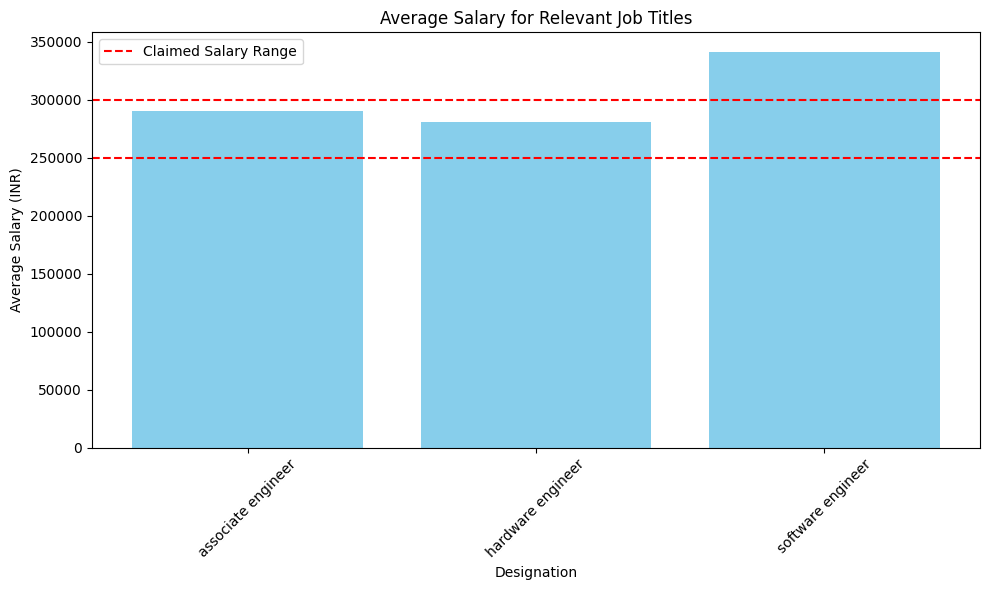

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(salary_results['Designation'], salary_results['Average Salary (INR)'], color='skyblue')
plt.xlabel('Designation')
plt.ylabel('Average Salary (INR)')
plt.title('Average Salary for Relevant Job Titles')
plt.xticks(rotation=45)
plt.axhline(y=claimed_salary_range[0], color='r', linestyle='--', label='Claimed Salary Range')
plt.axhline(y=claimed_salary_range[1], color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")


There is a significant relationship between gender and specialization.


In [17]:
df[df['Designation'] == 'hardware engineer']

,travel_type,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
197,train,1001099,240000,2014-09-01,present,hardware engineer,chennai,m,1993-06-06,81.00,...,-1,-1,580,-1,-1,0.1282,-0.6201,0.0100,0.77980,-0.8608
802,train,1077576,450000,2014-02-01,present,hardware engineer,Bangalore,m,1991-07-26,83.30,...,-1,-1,-1,-1,-1,-0.0154,-0.6201,0.3174,-1.50210,-1.8189
839,train,693533,315000,2013-08-01,2015-02-01 00:00:00,hardware engineer,Mumbai,m,1989-10-02,78.80,...,-1,-1,-1,366,-1,0.2718,1.2114,0.1637,-0.99500,0.4805
1886,train,354739,105000,2014-03-01,2015-04-01 00:00:00,hardware engineer,Bangalore,m,1988-08-12,56.00,...,-1,-1,-1,-1,-1,-1.8083,0.3838,0.2729,0.17980,-0.1295
2070,train,555964,180000,2014-05-01,present,hardware engineer,Bangalore,f,1991-10-18,86.40,...,-1,-1,-1,-1,-1,0.4155,0.5454,-1.0659,0.27270,1.0554
2533,train,909998,400000,2014-07-01,2015-05-01 00:00:00,hardware engineer,Coimbatore,f,1993-02-11,88.00,...,-1,-1,-1,-1,-1,0.1282,0.8784,0.4711,-1.50210,-0.0943
3438,train,341274,400000,2013-10-01,present,hardware engineer,-1,m,1990-12-08,90.58,...,-1,-1,-1,-1,-1,0.1623,0.6568,-0.4891,-1.14217,-0.4455
3547,train,212076,160000,2014-01-01,present,hardware engineer,Mumbai,m,1989-02-25,55.33,...,-1,-1,-1,-1,-1,-0.2628,0.0328,0.8171,0.53230,-0.2875


In [1]:

gender_specialization_cross_tab = pd.crosstab(df['Gender'], df['Specialization'])
gender_specialization_results = gender_specialization_cross_tab.reset_index()




NameError: name 'pd' is not defined

In [28]:
gender_specialization_results

Specialization,Gender,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
0,f,1,2,0,2,9,0,1,6,0,...,0,0,0,10,1,0,0,0,0,1
1,m,2,7,5,0,6,1,8,23,1,...,1,1,5,191,3,2,13,1,1,5


In [26]:
gender_specialization_results.columns


Index(['Gender', 'aeronautical engineering',
       'applied electronics and instrumentation',
       'automobile/automotive engineering', 'biomedical engineering',
       'biotechnology', 'ceramic engineering', 'chemical engineering',
       'civil engineering', 'computer and communication engineering',
       'computer application', 'computer engineering', 'computer networking',
       'computer science', 'computer science & engineering',
       'computer science and technology',
       'control and instrumentation engineering',
       'electrical and power engineering', 'electrical engineering',
       'electronics', 'electronics & instrumentation eng',
       'electronics & telecommunications',
       'electronics and communication engineering',
       'electronics and computer engineering',
       'electronics and electrical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'embedded systems technology',
       'industrial & mana

<Figure size 2000x800 with 0 Axes>

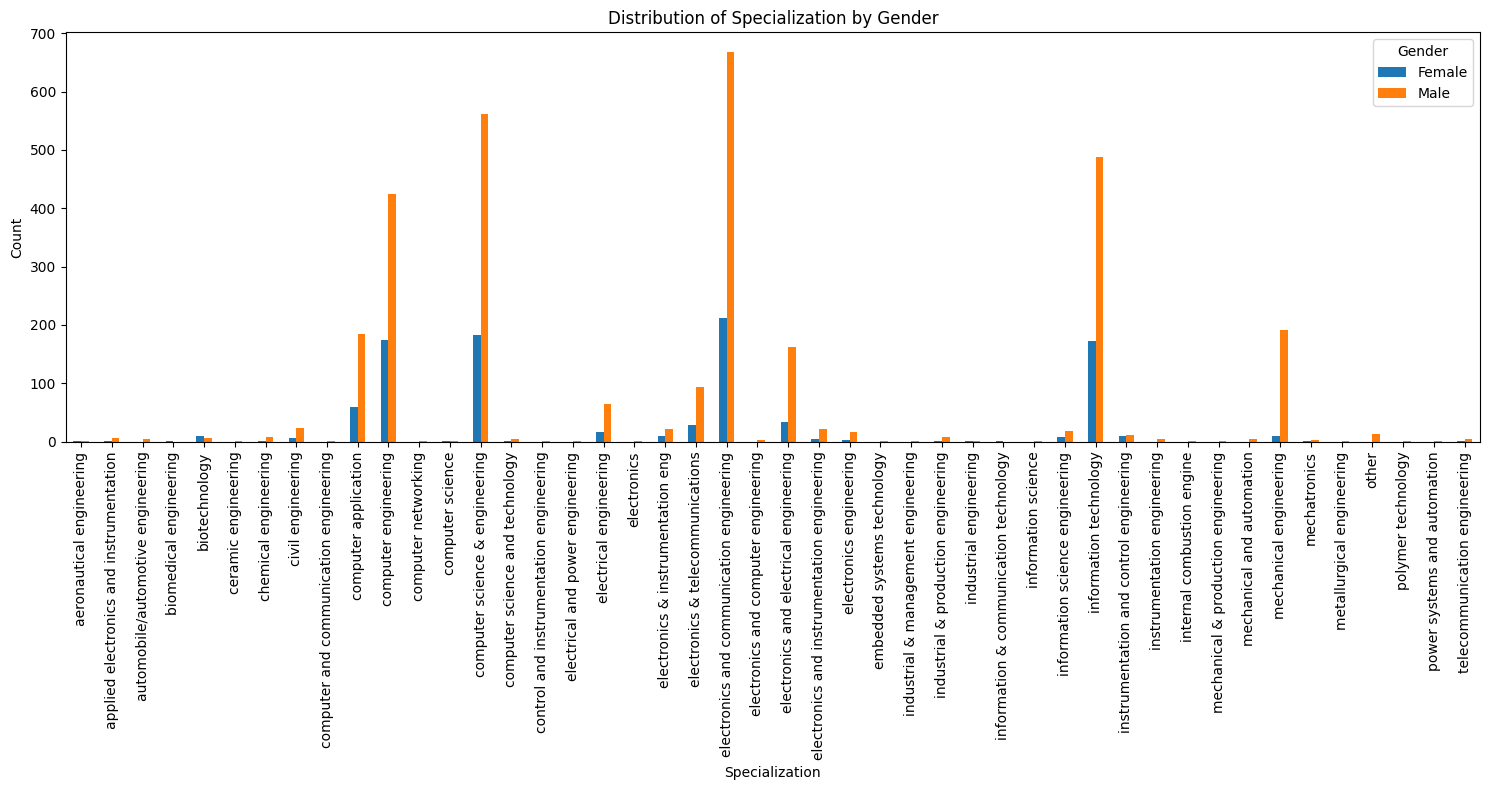

In [37]:
gender_specialization_results_transposed = gender_specialization_results.T

# Plotting the bar chart
plt.figure(figsize=(20, 8))
ax = gender_specialization_results_transposed.drop('Gender').plot(kind='bar', stacked=False, figsize=(15, 8))
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Distribution of Specialization by Gender')
plt.xticks(rotation=90)

# Update legend labels
legend_labels = {'0': 'Female', '1': 'Male'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[label] for label in labels], title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
numerical_cols

# **Salary**

In [ ]:
salary_data = df['Salary']

# Plot the PDF using Matplotlib
plt.figure(figsize=(8, 6))
salary_data.plot(kind='density')
plt.xlabel('Salary')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) Plot for Salary')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Probability Density Function (PDF) Plot for Salary')
plt.show()


In [ ]:
plt.subplot(1, 2, 2)
plt.boxplot(salary_data, vert=False)
plt.xlabel('Salary')
plt.title('Boxplot for Salary')
plt.grid(True)

plt.tight_layout()
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for Salary')
plt.show()

# **Gender**

In [ ]:
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Countplot for Gender')

plt.tight_layout()
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for Gender')
plt.show()

In [ ]:
percentage_10_data = df['10percentage']

# Plot the PDF using Matplotlib
plt.figure(figsize=(8, 6))
percentage_10_data.plot(kind='density')
plt.xlabel('10percentage')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) Plot for 10percentage')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Probability Density Function (PDF) Plot for 10percentage')
plt.show()

In [ ]:
plt.subplot(1, 2, 2)
plt.boxplot(percentage_10_data, vert=True)
plt.xlabel('percentage_10')
plt.title('Boxplot for percentage_10')
plt.grid(True)

plt.tight_layout()
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for percentage_10')
plt.show()

# **12graduation**

In [ ]:
percentage_12_data = df['10percentage']

# Plot the PDF using Matplotlib
plt.figure(figsize=(8, 6))
percentage_12_data.plot(kind='density')
plt.xlabel('12graduation')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) Plot for 12graduation')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Probability Density Function (PDF) Plot for 12graduation')
plt.show()

In [ ]:
plt.subplot(1, 2, 2)
plt.boxplot(percentage_12_data, vert=True)
plt.xlabel('12graduation')
plt.title('Boxplot for 12graduation')
plt.grid(True)

plt.tight_layout()
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for 12graduation')
plt.show()

# **CollegeTier**

In [ ]:
plt.figure(figsize=(2, 6))
sns.countplot(data=df, x='CollegeTier')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.title('Countplot for College Tier')
#plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/ountplot for College Tier')
plt.show()

# **collegeGPA**

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot boxplot for collegeGPA
sns.boxplot(data=df, x='collegeGPA', ax=ax)
ax.set_xlabel('College GPA')
ax.set_title('Boxplot for College GPA')
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for College GPAy')

plt.show()

# **CollegeCityTier**

In [ ]:
fig, ax = plt.subplots(figsize=(4, 6))

# Plot countplot for CollegeCityTier
sns.countplot(data=df, x='CollegeCityTier', ax=ax)
ax.set_xlabel('College City Tier')
ax.set_ylabel('Count')
ax.set_title('Countplot for College City Tier')

plt.tight_layout()
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for College City Tier')
plt.show()

# **GraduationYear**

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GraduationYear')
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('Countplot for Graduation Year')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for Graduation Year')
plt.show()

# **All Subject**

In [ ]:
columns = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
           'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
           'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Plot histograms for each column
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.grid(True)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')

plt.tight_layout()

plt.show()

In [ ]:
column = 'English'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'Logical'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'Quant'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'Domain'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'ComputerProgramming'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'ElectronicsAndSemicon'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'ComputerScience'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'MechanicalEngg'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'ElectricalEngg'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'TelecomEngg'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
column = 'CivilEngg'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title(f'Histogram for {column}')
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for {column}')
plt.show()

In [ ]:
plt.figure(figsize=(10, 20))

# Histogram
plt.subplot(3, 1, 1)
plt.hist(df['conscientiousness'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Conscientiousness')
plt.ylabel('Frequency')
plt.title('Histogram for Conscientiousness')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for Conscientiousness')

# Countplot
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='conscientiousness')
plt.xlabel('Conscientiousness')
plt.ylabel('Count')
plt.title('Countplot for Conscientiousness')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for Conscientiousness')

# Boxplot
plt.subplot(3, 1, 3)
sns.boxplot(data=df, y='conscientiousness')
plt.ylabel('Conscientiousness')
plt.title('Boxplot for Conscientiousness')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for Conscientiousness')

plt.tight_layout()
plt.show()

# **agreeableness**

In [ ]:
plt.figure(figsize=(18, 18))

# Histogram
plt.subplot(3, 1, 1)
plt.hist(df['agreeableness'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Agreeableness')
plt.ylabel('Frequency')
plt.title('Histogram for Agreeableness')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for Agreeableness')

# Countplot
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='agreeableness')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.title('Countplot for Agreeableness')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for Agreeableness')

# Boxplot
plt.subplot(3, 1, 3)
sns.boxplot(data=df, y='agreeableness')
plt.ylabel('Agreeableness')
plt.title('Boxplot for Agreeableness')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for Agreeableness')

plt.tight_layout()
plt.show()

# **Extraversion**

In [ ]:
plt.figure(figsize=(18, 18))

# Histogram
plt.subplot(3, 1, 1)
plt.hist(df['extraversion'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Extraversion')
plt.ylabel('Frequency')
plt.title('Histogram for Extraversion')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for Extraversion')

# Countplot
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='extraversion')
plt.xlabel('Extraversion')
plt.ylabel('Count')
plt.title('Countplot for Extraversion')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for Extraversion')

# Boxplot
plt.subplot(3, 1, 3)
sns.boxplot(data=df, y='extraversion')
plt.ylabel('Extraversion')
plt.title('Boxplot for Extraversion')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for Extraversion')

plt.tight_layout()
plt.show()

# **Nueroticism**

In [ ]:
plt.figure(figsize=(18, 18))

# Histogram
plt.subplot(3, 1, 1)
plt.hist(df['nueroticism'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Nueroticism')
plt.ylabel('Frequency')
plt.title('Histogram for Nueroticism')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for Nueroticism')

# Countplot
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='nueroticism')
plt.xlabel('Nueroticism')
plt.ylabel('Count')
plt.title('Countplot for Nueroticism')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for Nueroticism')

# Boxplot
plt.subplot(3, 1, 3)
sns.boxplot(data=df, y='nueroticism')
plt.ylabel('Nueroticism')
plt.title('Boxplot for Nueroticism')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for Nueroticism')

plt.tight_layout()
plt.show()

# **Openness to Experience**

In [ ]:
plt.figure(figsize=(18, 18))

# Histogram
plt.subplot(3, 1, 1)
plt.hist(df['openess_to_experience'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Openness to Experience')
plt.ylabel('Frequency')
plt.title('Histogram for Openness to Experience')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Histogram for Openness to Experience')

# Countplot
plt.subplot(3, 1, 2)
sns.countplot(data=df, x='openess_to_experience')
plt.xlabel('Openness to Experience')
plt.ylabel('Count')
plt.title('Countplot for Openness to Experience')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Countplot for Openness to Experience')

# Boxplot
plt.subplot(3, 1, 3)
sns.boxplot(data=df, y='openess_to_experience')
plt.ylabel('Openness to Experience')
plt.title('Boxplot for Openness to Experience')
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Boxplot for Openness to Experience')

plt.tight_layout()
plt.show()

In [ ]:
col = ['DOJ',  'DOB', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Salary'], df[col_name], color='m')
    plt.title(f'Scatter plot between Salary and {col_name}')
    plt.xlabel('Salary')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between Salary and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)


In [ ]:
col = [ 'DOB', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['DOJ'], df[col_name], color='m')
    plt.title(f'Scatter plot between DOJ and {col_name}')
    plt.xlabel('DOJ')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between DOJ and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ '10percentage', '12graduation', '12percentage',
       'CollegeID', 'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['DOB'], df[col_name], color='m')
    plt.title(f'Scatter plot between DOB and {col_name}')
    plt.xlabel('DOB')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between DOB and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['Gender', '12graduation', '12percentage',
       'CollegeID', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['10percentage'], df[col_name], color='m')
    plt.title(f'Scatter plot between 10percentage and {col_name}')
    plt.xlabel('10percentage')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between 10percentage and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['12percentage',
       'CollegeID','collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['12graduation'], df[col_name], color='m')
    plt.title(f'Scatter plot between 12graduation and {col_name}')
    plt.xlabel('12graduation')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between 12graduation and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['CollegeID', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeState',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['12percentage'], df[col_name], color='m')
    plt.title(f'Scatter plot between 12percentage and {col_name}')
    plt.xlabel('12percentage')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between 12percentage and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['CollegeID'], df[col_name], color='m')
    plt.title(f'Scatter plot between CollegeID and {col_name}')
    plt.xlabel('CollegeID')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between CollegeID and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['collegeGPA'], df[col_name], color='m')
    plt.title(f'Scatter plot between collegeGPA and {col_name}')
    plt.xlabel('collegeGPA')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between collegeGPA and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['CollegeCityID'], df[col_name], color='m')
    plt.title(f'Scatter plot between CollegeCityID and {col_name}')
    plt.xlabel('CollegeCityID')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between CollegeCityID and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['Gender', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['English'], df[col_name], color='m')
    plt.title(f'Scatter plot between English and {col_name}')
    plt.xlabel('English')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between English and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Logical'], df[col_name], color='m')
    plt.title(f'Scatter plot between Logical and {col_name}')
    plt.xlabel('Logical')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between Logical and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Quant'], df[col_name], color='m')
    plt.title(f'Scatter plot between Quant and {col_name}')
    plt.xlabel('Quant')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between Quant and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Domain'], df[col_name], color='m')
    plt.title(f'Scatter plot between Domain and {col_name}')
    plt.xlabel('Domain')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between Domain and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['ComputerProgramming'], df[col_name], color='m')
    plt.title(f'Scatter plot between ComputerProgramming and {col_name}')
    plt.xlabel('ComputerProgramming')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between ComputerProgramming and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['ElectronicsAndSemicon'], df[col_name], color='m')
    plt.title(f'Scatter plot between ElectronicsAndSemicon and {col_name}')
    plt.xlabel('ElectronicsAndSemicon')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between ElectronicsAndSemicon and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['ComputerScience'], df[col_name], color='m')
    plt.title(f'Scatter plot between ComputerScience and {col_name}')
    plt.xlabel('ComputerScience')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between ComputerScience and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['MechanicalEngg'], df[col_name], color='m')
    plt.title(f'Scatter plot between MechanicalEngg and {col_name}')
    plt.xlabel('MechanicalEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between MechanicalEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['ElectricalEngg'], df[col_name], color='m')
    plt.title(f'Scatter plot between ElectricalEngg and {col_name}')
    plt.xlabel('ElectricalEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between ElectricalEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['CivilEngg'], df[col_name], color='m')
    plt.title(f'Scatter plot between CivilEngg and {col_name}')
    plt.xlabel('CivilEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between CivilEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['nueroticism'], df[col_name], color='m')
    plt.title(f'Scatter plot between nueroticism and {col_name}')
    plt.xlabel('nueroticism')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between nueroticism and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['extraversion'], df[col_name], color='m')
    plt.title(f'Scatter plot between extraversion and {col_name}')
    plt.xlabel('extraversion')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between extraversion and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['agreeableness'], df[col_name], color='m')
    plt.title(f'Scatter plot between agreeableness and {col_name}')
    plt.xlabel('agreeableness')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between agreeableness and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['Gender','conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['conscientiousness'], df[col_name], color='m')
    plt.title(f'Scatter plot between conscientiousness and {col_name}')
    plt.xlabel('conscientiousness')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between conscientiousness and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['TelecomEngg'], df[col_name], color='m')
    plt.title(f'Scatter plot between TelecomEngg and {col_name}')
    plt.xlabel('TelecomEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Scatter plot between TelecomEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
df.columns

In [ ]:
col = ['10percentage', '12graduation', '12percentage',
       'CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['Salary'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between Salary and {col_name}')
    plt.xlabel('Salary')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between Salary and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)



In [ ]:
col = ['12graduation', '12percentage',
       'CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['10percentage'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between 10percentage and {col_name}')
    plt.xlabel('10percentage')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between 10percentage and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['12percentage',
       'CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['12graduation'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between 12graduation and {col_name}')
    plt.xlabel('12graduation')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between 12graduation and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['12percentage'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between 12percentage and {col_name}')
    plt.xlabel('12percentage')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between 12percentage and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['CollegeID'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between CollegeID and {col_name}')
    plt.xlabel('CollegeID')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between CollegeID and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = [ 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['collegeGPA'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between collegeGPA and {col_name}')
    plt.xlabel('collegeGPA')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between collegeGPA and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['CollegeCityID'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between CollegeCityID and {col_name}')
    plt.xlabel('CollegeCityID')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between CollegeCityID and {col_name}')

    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['English'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between English and {col_name}')
    plt.xlabel('English')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between English and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['Logical'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between Logical and {col_name}')
    plt.xlabel('Logical')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between Logical and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['Quant'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between Quant and {col_name}')
    plt.xlabel('Quant')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between Quant and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['Domain'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between Domain and {col_name}')
    plt.xlabel('Domain')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between Domain and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['ComputerProgramming'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between ComputerProgramming and {col_name}')
    plt.xlabel('ComputerProgramming')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between ComputerProgramming and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['ElectronicsAndSemicon'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between ElectronicsAndSemicon and {col_name}')
    plt.xlabel('ElectronicsAndSemicon')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between ElectronicsAndSemicon and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['ComputerScience'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between ComputerScience and {col_name}')
    plt.xlabel('ComputerScience')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between ComputerScience and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['MechanicalEngg'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between MechanicalEngg and {col_name}')
    plt.xlabel('MechanicalEngg')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between MechanicalEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['ElectricalEngg'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between ElectricalEngg and {col_name}')
    plt.xlabel('ElectricalEngg')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between ElectricalEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['TelecomEngg'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between TelecomEngg and {col_name}')
    plt.xlabel('TelecomEngg')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between TelecomEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['CivilEngg'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between CivilEngg and {col_name}')
    plt.xlabel('CivilEngg')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between CivilEngg and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['conscientiousness'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between conscientiousness and {col_name}')
    plt.xlabel('conscientiousness')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between conscientiousness and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['agreeableness'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between agreeableness and {col_name}')
    plt.xlabel('agreeableness')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between agreeableness and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    plt.hexbin(df['extraversion'], df[col_name], gridsize=20, cmap='PRGn')
    plt.title(f'Hexbin plot between extraversion and {col_name}')
    plt.xlabel('extraversion')
    plt.ylabel(col_name)
    plt.colorbar(label='count in bin')
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between extraversion and {col_name}')
    plt.show()
    plt.subplots_adjust(bottom=0.2)

In [ ]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['nueroticism'], df['openess_to_experience'], gridsize=20, cmap='PRGn')
plt.title(f'Hexbin plot between nueroticism and openess_to_experience')
plt.xlabel('nueroticism')
plt.ylabel('openess_to_experience')
plt.colorbar(label='count in bin')
plt.savefig(r'/content/drive/MyDrive/Innomatics Research lab/Figures/Hexbin plot between nueroticism and openess_to_experience')
plt.show()
plt.subplots_adjust(bottom=0.2)

In [ ]:
col = ['10percentage', '12graduation', '12percentage',
       'CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['Salary'], y_vars=[col_name])
    plt.title(f'Pairplot between Salary and {col_name}')
    plt.xlabel('Salary')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between Salary and {col_name}')
    plt.show()

In [ ]:
col = ['12graduation', '12percentage',
       'CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['10percentage'], y_vars=[col_name])
    plt.title(f'Pairplot between 10percentage and {col_name}')
    plt.xlabel('10percentage')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between 10percentage and {col_name}')
    plt.show()

In [ ]:
col = ['12percentage',
       'CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['12graduation'], y_vars=[col_name])
    plt.title(f'Pairplot between 12graduation and {col_name}')
    plt.xlabel('12graduation')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between 12graduation and {col_name}')
    plt.show()

In [ ]:
col = ['CollegeID',  'collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['12percentage'], y_vars=[col_name])
    plt.title(f'Pairplot between 12percentage and {col_name}')
    plt.xlabel('12percentage')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between 12percentage and {col_name}')
    plt.show()

In [ ]:
col = ['collegeGPA', 'CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['CollegeID'], y_vars=[col_name])
    plt.title(f'Pairplot between CollegeID and {col_name}')
    plt.xlabel('CollegeID')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between CollegeID and {col_name}')
    plt.show()

In [ ]:
col = ['CollegeCityID',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['collegeGPA'], y_vars=[col_name])
    plt.title(f'Pairplot between collegeGPA and {col_name}')
    plt.xlabel('collegeGPA')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between collegeGPA and {col_name}')
    plt.show()

In [ ]:
col = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['CollegeCityID'], y_vars=[col_name])
    plt.title(f'Pairplot between CollegeCityID and {col_name}')
    plt.xlabel('CollegeCityID')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between CollegeCityID and {col_name}')
    plt.show()

In [ ]:
col = ['Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['English'], y_vars=[col_name])
    plt.title(f'Pairplot between English and {col_name}')
    plt.xlabel('English')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between English and {col_name}')
    plt.show()

In [ ]:
col = ['Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['Logical'], y_vars=[col_name])
    plt.title(f'Pairplot between Logical and {col_name}')
    plt.xlabel('Logical')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between Logical and {col_name}')
    plt.show()

In [ ]:
col = ['Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['Quant'], y_vars=[col_name])
    plt.title(f'Pairplot between Quant and {col_name}')
    plt.xlabel('Quant')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between Quant and {col_name}')
    plt.show()

In [ ]:
col = ['ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['Domain'], y_vars=[col_name])
    plt.title(f'Pairplot between Domain and {col_name}')
    plt.xlabel('Domain')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between Domain and {col_name}')
    plt.show()

In [ ]:
col = ['ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['ComputerProgramming'], y_vars=[col_name])
    plt.title(f'Pairplot between ComputerProgramming and {col_name}')
    plt.xlabel('ComputerProgramming')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between ComputerProgramming and {col_name}')
    plt.show()

In [ ]:
col = ['ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['ElectronicsAndSemicon'], y_vars=[col_name])
    plt.title(f'Pairplot between ElectronicsAndSemicon and {col_name}')
    plt.xlabel('ElectronicsAndSemicon')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between ElectronicsAndSemicon and {col_name}')
    plt.show()

In [ ]:
col = ['MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['ComputerScience'], y_vars=[col_name])
    plt.title(f'Pairplot between ComputerScience and {col_name}')
    plt.xlabel('ComputerScience')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between ComputerScience and {col_name}')
    plt.show()

In [ ]:
col = ['ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['MechanicalEngg'], y_vars=[col_name])
    plt.title(f'Pairplot between MechanicalEngg and {col_name}')
    plt.xlabel('MechanicalEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between MechanicalEngg and {col_name}')
    plt.show()

In [ ]:
col = ['TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['ElectricalEngg'], y_vars=[col_name])
    plt.title(f'Pairplot between ElectricalEngg and {col_name}')
    plt.xlabel('ElectricalEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between ElectricalEngg and {col_name}')
    plt.show()

In [ ]:
col = ['CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['TelecomEngg'], y_vars=[col_name])
    plt.title(f'Pairplot between TelecomEngg and {col_name}')
    plt.xlabel('TelecomEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between TelecomEngg and {col_name}')
    plt.show()

In [ ]:
col = ['conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['CivilEngg'], y_vars=[col_name])
    plt.title(f'Pairplot between CivilEngg and {col_name}')
    plt.xlabel('CivilEngg')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between CivilEngg and {col_name}')
    plt.show()

In [ ]:
col = ['agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['conscientiousness'], y_vars=[col_name])
    plt.title(f'Pairplot between conscientiousness and {col_name}')
    plt.xlabel('conscientiousness')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between conscientiousness and {col_name}')
    plt.show()

In [ ]:
col = ['extraversion',
       'nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['agreeableness'], y_vars=[col_name])
    plt.title(f'Pairplot between agreeableness and {col_name}')
    plt.xlabel('agreeableness')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between agreeableness and {col_name}')
    plt.show()

In [ ]:
col = ['nueroticism', 'openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['extraversion'], y_vars=[col_name])
    plt.title(f'Pairplot between extraversion and {col_name}')
    plt.xlabel('extraversion')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between extraversion and {col_name}')
    plt.show()

In [ ]:
col = ['openess_to_experience']

for col_name in col:
    plt.figure(figsize=(8, 6))
    sns.pairplot(data=df, x_vars=['nueroticism'], y_vars=[col_name])
    plt.title(f'Pairplot between nueroticism and {col_name}')
    plt.xlabel('nueroticism')
    plt.ylabel(col_name)
    plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Pairplot between nueroticism and {col_name}')
    plt.show()

In [ ]:
categorical_columns = ['Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(10, 60))
        sns.boxplot(x=num_col, y='Designation', data=df)
        plt.title(f'Designation vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot Designation vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(10, 60))
        sns.boxplot(x=num_col, y='JobCity', data=df)
        plt.title(f'JobCity vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot JobCity vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(10, 60))
        sns.boxplot(x=num_col, y='10board', data=df)
        plt.title(f'10board vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot 10board vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 5))
        sns.boxplot(x=num_col, y='Gender', data=df)
        plt.title(f'Gender vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot Gender vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 8))
        sns.boxplot(x=num_col, y='Degree', data=df)
        plt.title(f'Degree vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot Degree vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 8))
        sns.boxplot(x=num_col, y='Specialization', data=df)
        plt.title(f'Specialization vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot Specialization vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 8))
        sns.boxplot(x=num_col, y='CollegeState', data=df)
        plt.title(f'CollegeState vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot CollegeState vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(10, 60))
        sns.boxplot(x=num_col, y='12board', data=df)
        plt.title(f'12board vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/boxplot 12board vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(10, 60))
        sns.swarmplot(x=num_col, y='Designation', data=df)
        plt.title(f'Designation vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/swarmplot Designation vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(10, 60))
        sns.swarmplot(x=num_col, y='JobCity', data=df)
        plt.title(f'JobCity vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/swarmplot JobCity vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 5))
        sns.barplot(x=num_col, y='Gender', data=df)
        plt.title(f'Gender vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/barplot Gender vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 8))
        sns.barplot(x=num_col, y='Degree', data=df)
        plt.title(f'Degree vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/barplot Degree vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 8))
        sns.barplot(x=num_col, y='Specialization', data=df)
        plt.title(f'Specialization vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/barplot Specialization vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
for num_col in numerical_columns:
        plt.figure(figsize=(9, 8))
        sns.barplot(x=num_col, y='CollegeState', data=df)
        plt.title(f'CollegeState vs {num_col}')
        plt.xticks(rotation=45)
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/barplot CollegeState vs {num_col}')
        plt.show()
        plt.subplots_adjust(bottom=0.2)

In [ ]:
categorical_columns = [ 'Gender', 'Degree']

# Plot stacked bar plots for relationships between categorical columns
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        plt.figure(figsize=(min(len(df[categorical_columns[i]].unique()) * 0.5, 15), min(len(df[categorical_columns[j]].unique()) * 0.5, 10)))
        stacked_data = df.groupby([categorical_columns[i], categorical_columns[j]]).size().unstack()
        stacked_data.plot(kind='bar', stacked=True)
        plt.title(f'Stacked Bar Plot of {categorical_columns[i]} vs {categorical_columns[j]}')
        plt.xticks(rotation=45)
        plt.legend(title=categorical_columns[j])
        plt.savefig(f'/content/drive/MyDrive/Innomatics Research lab/Figures/Stacked Bar Plot of {categorical_columns[i]} vs {categorical_columns[j]}')
        plt.show()

In [ ]:
corr = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')

plt.savefig('correlation_heatmap.png')

plt.show()